In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img

In [ ]:
## Data Preparation

In [ ]:
● Download and extract the cats vs. dogs dataset.
● Organize the dataset into a structured directory format suitable for
TensorFlow’s ImageDataGenerator.
● Split the dataset into training and testing sets

In [ ]:
!unzip -q train-20240413T014330Z-001.zip

In [ ]:
# checking for any incorrect format

In [ ]:
num_skipped = 0
for folder_name in ("cats", "dogs"):
    folder_path = os.path.join("train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 0 images.


In [ ]:
!ls

sample_data  train  train-20240413T014330Z-001.zip


In [ ]:
!ls train

cats  dogs


In [ ]:
## splitting data

In [ ]:
image_size = (200, 200)
batch_size = 128

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "train",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


In [ ]:
## Data Augmentation and pre processing
##Implement data augmentation techniques to increase the diversity of the
##training dataset, aiding in the model's ability to generalize.
##● Normalize the pixel values of the images for optimal model performance.

In [ ]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

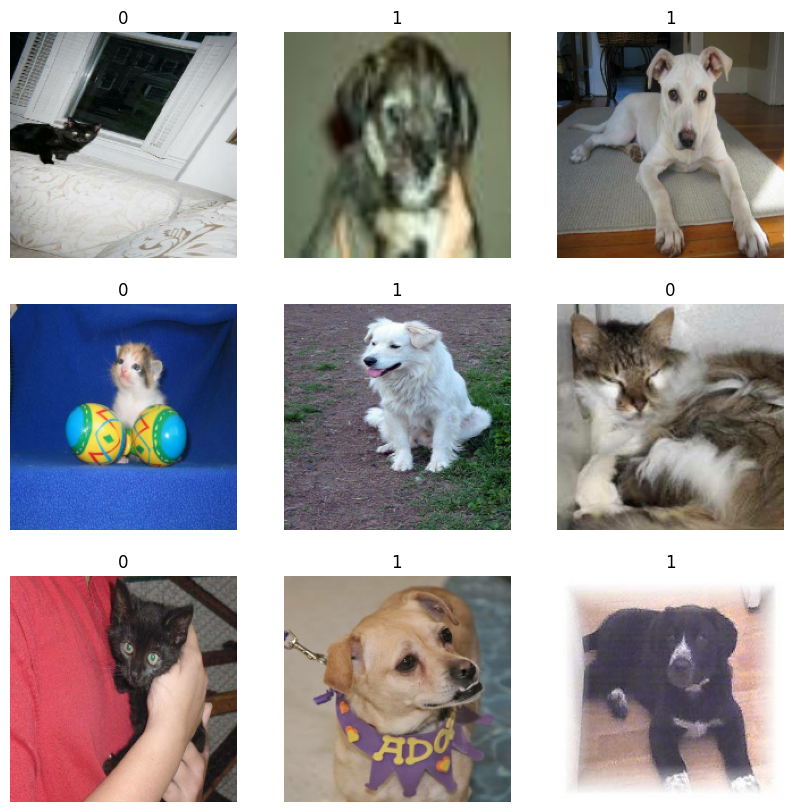

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

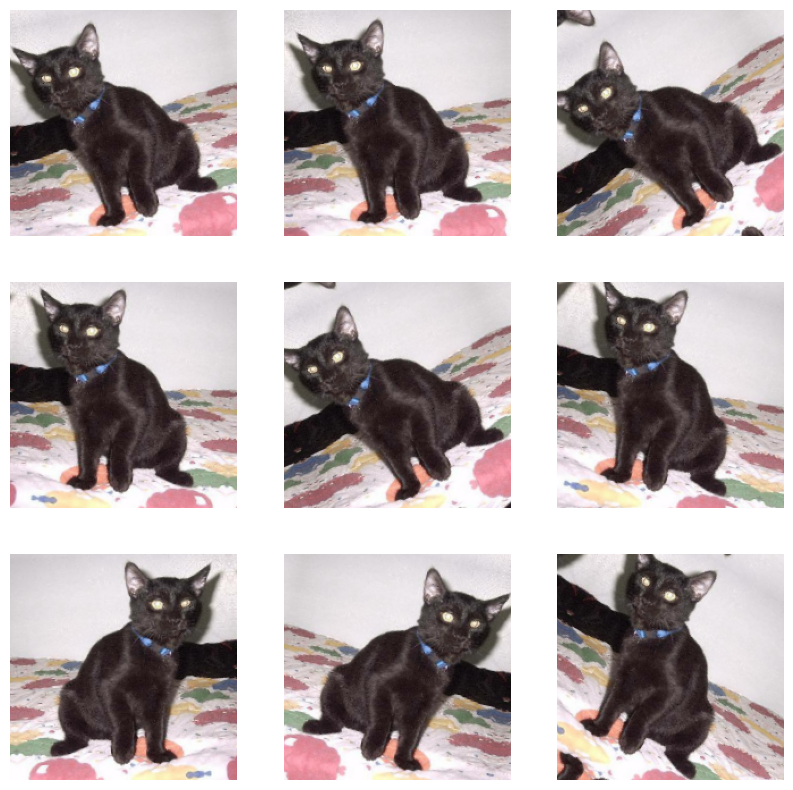

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(augmented_images[0]).astype("uint8"))
        plt.axis("off")

In [ ]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [ ]:
## model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPool2D, Activation

In [ ]:
# first we are using two convolutional layers

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(Flatten())
model.add(Dense(1, activation= "sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
13/13 [==============================] - 40s 3s/step - loss: 563.3177 - accuracy: 0.4806 - val_loss: 318.5666 - val_accuracy: 0.5025
Epoch 2/5
13/13 [==============================] - 38s 3s/step - loss: 154.3828 - accuracy: 0.5025 - val_loss: 81.2997 - val_accuracy: 0.4975
Epoch 3/5
13/13 [==============================] - 39s 3s/step - loss: 60.1356 - accuracy: 0.5350 - val_loss: 29.9101 - val_accuracy: 0.5375
Epoch 4/5
13/13 [==============================] - 46s 3s/step - loss: 13.1319 - accuracy: 0.6313 - val_loss: 17.3468 - val_accuracy: 0.5275
Epoch 5/5
13/13 [==============================] - 39s 3s/step - loss: 4.6204 - accuracy: 0.7350 - val_loss: 5.9170 - val_accuracy: 0.5200


In [ ]:
model.save(r"C:\Users\Ashutosh\Documents\Deep Learning Handson-Assignment- Tanu\new.keras")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 3)       84        
                                                                 
 conv2d_7 (Conv2D)           (None, 196, 196, 3)       84        
                                                                 
 flatten_2 (Flatten)         (None, 115248)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 115249    
                                                                 
Total params: 115417 (450.85 KB)
Trainable params: 115417 (450.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## lets try increasing the accuracy , add one max pool layer

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1, activation= "sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
13/13 [==============================] - 42s 3s/step - loss: 16.5361 - accuracy: 0.5288 - val_loss: 5.9039 - val_accuracy: 0.5500
Epoch 2/5
13/13 [==============================] - 44s 3s/step - loss: 5.2325 - accuracy: 0.6294 - val_loss: 4.1479 - val_accuracy: 0.5925
Epoch 3/5
13/13 [==============================] - 41s 3s/step - loss: 2.5686 - accuracy: 0.6625 - val_loss: 3.4892 - val_accuracy: 0.5875
Epoch 4/5
13/13 [==============================] - 42s 3s/step - loss: 1.1959 - accuracy: 0.7400 - val_loss: 1.8457 - val_accuracy: 0.5850
Epoch 5/5
13/13 [==============================] - 41s 3s/step - loss: 0.6322 - accuracy: 0.7931 - val_loss: 1.8756 - val_accuracy: 0.6150


In [ ]:
/content/C:\Users\Ashutosh\Documents\Deep Learning Handson-Assignment- Tanu\new.h5

In [ ]:
# two convolutional layer, one max pool, one more convultional layer

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 3, kernel_size=(3,3), strides= (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(1, activation= "sigmoid"))

In [ ]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics="accuracy")

In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
13/13 [==============================] - 36s 2s/step - loss: 3.6954 - accuracy: 0.5044 - val_loss: 1.7226 - val_accuracy: 0.4900
Epoch 2/10
13/13 [==============================] - 35s 2s/step - loss: 1.2094 - accuracy: 0.4994 - val_loss: 1.0881 - val_accuracy: 0.5150
Epoch 3/10
13/13 [==============================] - 34s 2s/step - loss: 0.9072 - accuracy: 0.5156 - val_loss: 0.8706 - val_accuracy: 0.5225
Epoch 4/10
13/13 [==============================] - 35s 2s/step - loss: 0.8168 - accuracy: 0.5194 - val_loss: 0.8009 - val_accuracy: 0.5025
Epoch 5/10
13/13 [==============================] - 34s 2s/step - loss: 0.7426 - accuracy: 0.5231 - val_loss: 0.7698 - val_accuracy: 0.5250
Epoch 6/10
13/13 [==============================] - 37s 3s/step - loss: 0.7393 - accuracy: 0.5188 - val_loss: 0.7540 - val_accuracy: 0.5325
Epoch 7/10
13/13 [==============================] - 40s 3s/step - loss: 0.7260 - accuracy: 0.5231 - val_loss: 0.7429 - val_accuracy: 0.5300
Epoch 8/10
13/13 [==

In [ ]:
##Evaluation:
 #Evaluate the model's performance on the validation set during training to
#monitor for overfitting.
#● After training, assess the model's accuracy and make predictions on the
#test set.


In [ ]:
model.history.history

{'loss': [3.6953821182250977,
  1.2094354629516602,
  0.9071758389472961,
  0.8168070316314697,
  0.7425526976585388,
  0.7392582893371582,
  0.7259719371795654,
  0.7122889161109924,
  0.7277653217315674,
  0.7184167504310608],
 'accuracy': [0.5043749809265137,
  0.49937498569488525,
  0.515625,
  0.5193750262260437,
  0.5231249928474426,
  0.518750011920929,
  0.5231249928474426,
  0.5293750166893005,
  0.534375011920929,
  0.5231249928474426],
 'val_loss': [1.7225555181503296,
  1.0881024599075317,
  0.8706488609313965,
  0.8008873462677002,
  0.7697873711585999,
  0.7540143728256226,
  0.7429490089416504,
  0.7347313761711121,
  0.7274565100669861,
  0.7208282947540283],
 'val_accuracy': [0.49000000953674316,
  0.5149999856948853,
  0.5224999785423279,
  0.5024999976158142,
  0.5249999761581421,
  0.5325000286102295,
  0.5299999713897705,
  0.574999988079071,
  0.5699999928474426,
  0.5600000023841858]}

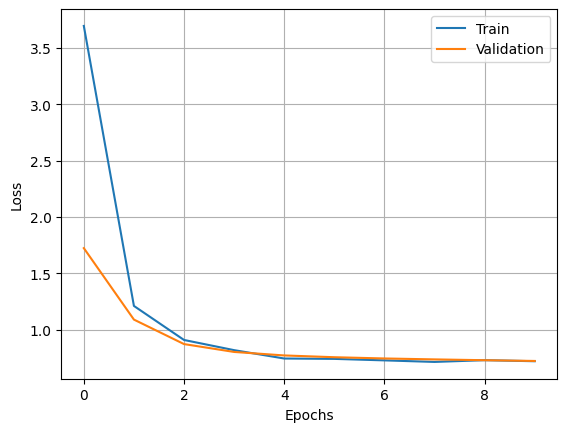

In [ ]:
history = model.history.history

train_loss= history["loss"]
val_loss= history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

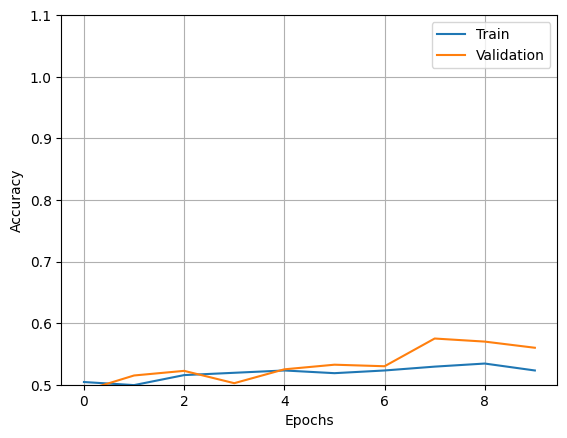

In [ ]:
train_acc= history["accuracy"]
val_acc= history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim(0.5,1.1)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model.save(r"cat&dogcnn.keras")

In [ ]:
##Prediction

In [ ]:
##Implement a system to make predictions on new images, categorizing
##them as either cat or dog
##The system should be able to take an image (or a batch of images),
##preprocess it, and pass it through the model

In [ ]:
image_for_prediction = load_img("/content/download_dog.jpg",target_size=(200,200))

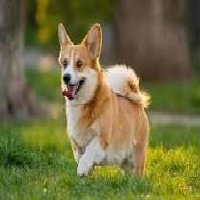

In [ ]:
image_for_prediction

In [ ]:
image_for_prediction  = np.array(image_for_prediction)
image_for_prediction = image_for_prediction.reshape(1,200,200,3)
##image_for_prediction = preprocess_input(image_for_prediction)

In [ ]:
image_for_prediction

array([[[[ 84,  80,  71],
         [ 86,  82,  73],
         [ 88,  84,  75],
         ...,
         [ 40,  38,  39],
         [ 41,  39,  40],
         [ 42,  42,  42]],

        [[ 86,  82,  73],
         [ 87,  83,  74],
         [ 87,  83,  74],
         ...,
         [ 41,  39,  40],
         [ 41,  39,  40],
         [ 43,  43,  43]],

        [[ 86,  82,  73],
         [ 87,  83,  74],
         [ 87,  83,  74],
         ...,
         [ 41,  39,  40],
         [ 41,  39,  40],
         [ 43,  43,  43]],

        ...,

        [[ 72, 100,  52],
         [ 81, 109,  60],
         [ 88, 117,  61],
         ...,
         [152, 150,  37],
         [141, 139,  20],
         [147, 141,  17]],

        [[ 72, 100,  52],
         [ 81, 109,  60],
         [ 88, 117,  61],
         ...,
         [152, 150,  37],
         [141, 139,  20],
         [147, 141,  17]],

        [[ 74, 102,  54],
         [ 79, 107,  58],
         [ 83, 112,  56],
         ...,
         [138, 136,  23],
        

In [ ]:
pred = model.predict(image_for_prediction)

1/1 [==============================] - 0s 89ms/step


In [ ]:
pred

array([[0.5454342]], dtype=float32)